

---






# **Projet Analyse Numerique** 

## Intégration Numérique
Ichrak Ben Saad
 
2DNI -G2















---










Le but de ce projet est de comparer les 4 méthode d'intégration numériques.

Importer des bibliothèques python

In [40]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

**Méthode des réctangles**





Cette méthode utilise le polynôme de degré le plus bas, à savoir
le polynôme constant :
P0(x) = f(a) = f0

In [41]:
  class RectangleG (object) :
    def __init__ (self , a , b ,n ,f) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
       
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[1] - x[0])
        s = sum(y[ 0 : -1])
        return h*s
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            x_rect = [xl[i] , xl[i] , xl[i+1] , xl[i+1] , xl[i] ]
            y_rect = [0 , yl[i] , yl[i] , 0 , 0 ]
            plt.plot(x_rect , y_rect ,'r')
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine)
        plt.plot(xl , yl , "bo")
        plt.xlabel ('x')
        plt.ylabel ('f(x)')
        plt.title('méthode de rectangle gauche')

**Méthode du point milieu**

Cette méthode utilise également le polynôme constant pour
approximer la fonction f. Cependant, elle exploite mieux les
symétries du problème en choisissant la valeur milieu :
P0 (x) = f((a+b)/2)=f0


In [44]:
class Milieu(object) :
    def __init__ (self , a , b ,n ,f) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n   
       
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[1] - x[0])
        s = 0
        for i in range (self.n) :
            s = s+f((x[i]+x[i+1])*0.5) 
        return h*s
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            m = (xl[i] + xl[i+1])/2
            x_rect = [xl[i] , xl[i] , xl[i+1] , xl[i+1] , xl[i] ]
            y_rect = [0 , f(m) , f(m) , 0 , 0 ]
            plt.plot(x_rect , y_rect ,'g')
            plt.plot(m , f(m) ,'r*')
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine , 'b')
        plt.xlabel ('x')
        plt.ylabel ('f(x)')
        plt.title('Méthode de Milieu')

**Méthode de Simpson**

Pour approximer la fonction f, cette méthode utilise le polynôme de degré 2 (la parabole) qui passe par
les trois points f0 = f(a), f1 = f
 a+b
2
et f2 = f(b) :


In [43]:
class Simpson(object) :
    def __init__ (self , a , b ,n ,f) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
        
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[2] - x[1])
        n = len(x) -1
        if n % 2 == 1 :
            s = y[0] + y[n] + 4.0 * sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        return h * s / 3.0
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            xx = np.linspace(xl[ i ],xl[i + 1],resolution)
            m = (xl[i]+ xl[i + 1])/ 2
            a = xl[i]
            b = xl[i +1]
            l0  =(xx-m)/(a-m)*(xx-b)/(a-b)
            l1 =(xx-a)/(m-a)*(xx-b)/(m-b)
            l2 =(xx-a)/(b-a)*(xx-m)/(b-m)
            P = f(a)*l0 + f(m)*l1 + f(b)*l2
            plt.plot(xx , P ,'r')
            plt.plot(m , f(m) ,'g*')
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine , 'y')
        plt.plot(xl , yl , "bo")
        plt.xlabel ('x')
        plt.ylabel ('f(x)')
        plt.title('Méthode de Simpson')

**Méthode des trapézes**





Pour approximer la fonction f, cette méthode utilise le polynôme
d’ordre 1 (la droite) qui passe par f0 = f(a) et f1 = f(b) :
P1(x) = ((f0 + f1)/2)+((f1-f2)/b-a)*(x-((a+b)/2)


In [42]:
class trapeze(object) :
    def __init__ (self , a , b ,n ,f) :
        self.a = a 
        self.b = b
        self.x = np.linspace(a,b,n+1)
        self.f = f
        self.n = n
    def integrate (self ,f) :
        x = self.x
        y = f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h*s/2.0
    def graphe (self , f , resolution =1001) :
        xl = self.x
        yl = f(xl)
        xlist_fine = np.linspace(self.a , self.b , resolution)
        for i in range (self.n) :
            x_rect = [xl[i] , xl[i] , xl[i+1] , xl[i+1] , xl[i] ]
            y_rect = [0 , yl[i] , yl[i] , 0 , 0 ]
            plt.plot(x_rect , y_rect ,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine)
        plt.plot(xl , yl , "cs")
        plt.ylabel ('f(x)')
        plt.title('Méthode des trapéze')


**création de l'interface**

In [56]:
Sel = widgets.Dropdown(
      options=[('Méthode de rectangle gauche',1) , ('Méthode des trapéze',2) , ('méthode de Simpson',3) , ('méthode de Milieu',4)] ,
      value=2 ,
      description='Choix de Méthode:',
)

text_func = widgets.Text(value='sin(x)' , description='Fonction' , continious_update=False)
text_xlabel = widgets.Text(value='' , description='abscisse' , continious_update=False)
text_ylabel = widgets.Text(value='' , description='ordonnée' , continious_update=False)
text_a = widgets.Text(value='-1' , description='a' , continious_update=False)
text_b = widgets.Text(value='1' , description='b' , continious_update=False)
text_n = widgets.Text(value='3' , description='N' , continious_update=False)
text_int = widgets.Text(value='' , description='I_N' , continious_update=True)
button = widgets.Button(description="Calculer",style= {'button_color':'red'})
def sim(b):
    dic={1:RectangleG,2:trapeze,3:Simpson,4:Milieu}
    s=Sel.value
    plt.cla()
    func=lambda x:eval(text_func.value) 
    R=dic[s](float(text_a.value), float(text_b.value),int(text_n.value),func)
    R.graphe(func)
    text_int.value=str(R.integrate(func))
    text_int.description='I_'+text_n.value
def update_a(change) :
    change.new
def update_b(change) :
    change.new
def update_n(change) :
    change.new
def update_f(change) :
    change.new

button.on_click(sim)

text_func.observe(update_f , 'value')
text_a.observe(update_a , 'value')
text_b.observe(update_b , 'value')

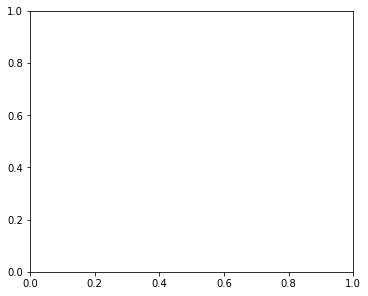

In [53]:
output = widgets.Output()
with output:
    fig, ax = plt.subplots(constrained_layout=True , figsize=(5,4))
fig.canvas.toolbar_position='bottom'

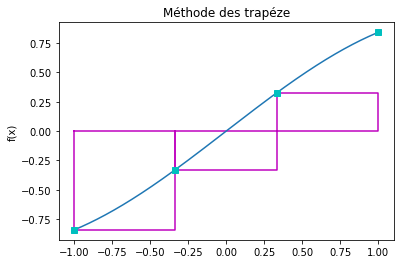

In [54]:
def make_boxes() :
    vbox1 = widgets.VBox([Sel,text_func,text_a,text_b,text_n,button,text_int])
    vbox2 = widgets.VBox([output])
    return vbox1,vbox2
box_layout = widgets.Layout(
        border='solid 2px blue',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')
vbox1,vbox2 = make_boxes()
vbox1.layout = box_layout
vbox2.layout = box_layout
widgets.HBox([vbox1,vbox2])

Bien évidemment, on peut construire des méthodes composites d’ordres plus élevés.
– Les méthodes utilisant des polynômes de degré plus élevé (tout en restant <8) sont plus précises (à
nombre de points égal). Plus précisément, l’erreur associée à l’utilisation d'un polynôme de degré p
décroît en n(p+1) si p est impair et n(p+2) si p est pair. Autrement dit, l’ordre des méthodes
associées est p + 1 si p est impair et p + 2 si p est pair.

– La précision de toutes les méthodes de Newton-Cote augmente avec le nombre de points utilisés.

– Numériquement, chaque addition génère une petite erreur d’arrondi machine (l’erreur relative est de
l’ordre de 1017 pour des réels doubles précision). Lorsque l’on somme beaucoup de nombres, les erreurs de chaque addition s’ajoutent et l’erreur relative totale augmente. Dans le cas des méthodes de
Newton-Cotes composites, une erreur due aux arrondis machine s’ajoute donc aux erreurs de troncations étudiées précédemment. Et cette erreur augmente avec le nombre de points. En pratique, on ne
peut donc pas augmenter infiniment le nombre d’intervalles des méthodes de Newton-Cotes, et il existe
un nombre de points particulier qui permet une précision optimale.